# Análisis de medios
## Caso 'Cambio climático'

In [1]:
from stop_words import get_stop_words
import pandas as pd
import warnings
import numpy as np

import AMP_lib as amp

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# VARIABLES INICIALES #
dsname="cambioclimatico"
n_max_tokens = 5000
n_max_tokens_toprint = 15
LDA_max_iter = 30
LDA_learning_offset = 50.
LDA_random_state = 10
ngram_range=(1, 1)

[INFO] - Obtención de stop-words y filtros
[nltk_data] Downloading package stopwords to /home/boris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/boris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[INFO] - Vectorización de Tokens
[INFO] - Cálculo de perplexity
	[DBUG] - (plotPerplexity()): (iter 1 of 15)
	[DBUG] - (plotPerplexity()): (iter 2 of 15)
	[DBUG] - (plotPerplexity()): (iter 3 of 15)
	[DBUG] - (plotPerplexity()): (iter 4 of 15)
	[DBUG] - (plotPerplexity()): (iter 5 of 15)
	[DBUG] - (plotPerplexity()): (iter 6 of 15)
	[DBUG] - (plotPerplexity()): (iter 7 of 15)
	[DBUG] - (plotPerplexity()): (iter 8 of 15)
	[DBUG] - (plotPerplexity()): (iter 9 of 15)
	[DBUG] - (plotPerplexity()): (iter 10 of 15)
	[DBUG] - (plotPerplexity()): (iter 11 of 15)
	[DBUG] - (plotPerplexity()): (iter 12 of 15)
	[DBUG] - (plotPerplexity()): (iter 13 of 15)
	[DBUG] - (plotPerplexity()): (iter 14 of 15)
	[DBUG] - (plotP

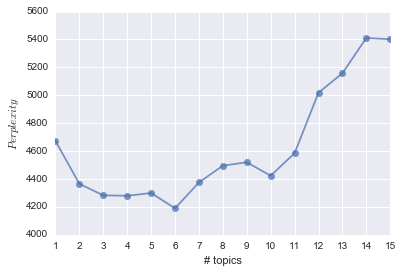

In [3]:
# lectura de datos
raw_data = pd.read_csv('dataset/sophia_%s_v2.csv' % dsname, sep='\n', header=None)

# DESCARGA STOP-WORDS
# obtener stopwords y aplicar filtro sobre el texto
print ("[INFO] - Obtención de stop-words y filtros")
docs, news_df2, stopwords = amp.stopwordsAndFilters(raw_data)

# Vectorización de tokens
print ("[INFO] - Vectorización de Tokens")
tf, tf_feature_names = amp.vectorizer(n_max_tokens=n_max_tokens, stopwords=stopwords, ngram_range=ngram_range, docs=docs)

# Análisis de perplexity
print ("[INFO] - Cálculo de perplexity")
amp.plotPerplexity(dsname=dsname, tf=tf, max_topics=15, max_iter=5, learning_offset=50., random_state=50)


## Resultados
En la Figura [fig_index] podemos identificar el menor valor de Perplexity para $n\_topics=6$.

In [4]:
# Elección de mejor n, según perplexity
n_topics = 6 # <-- Modificar según análisis

# Ejecución de LDA
W1, W2, components = amp.computeLDA(tf, n_topics, LDA_max_iter, LDA_learning_offset, LDA_random_state)

# asignar tópico a noticias
A_lda_keys = []
for i in range(W2.shape[0]):
    A_lda_keys.append( W2[i].argmax() )

news_df_topics = news_df2.assign(topic=np.array(A_lda_keys))

## Identificación del significado de cada tópico
En esta sección es necesario revisar algunas noticias del tópico para encontrar el "sentido" u "orientación" que representa.

In [5]:
news_df_topics[ news_df_topics['topic']==0 ]['text'][0:10]

n_top_topics=10

g_topics = news_df_topics.groupby('topic')
news_df_topics, topics_list = amp.getNewsWithTopic(tf_feature_names=tf_feature_names, components=components, W2=W2, n_topics=n_topics, news_df_original=news_df2)
for topic in range(n_topics):
    print("TOPIC #%s" % topic)
    print(topics_list[topic][0:10],"\n") # muestra 10 top palabras
    print("Ejemplo:")
    
    for art_text in news_df_topics[ news_df_topics['topic']==topic ]['text'][0:4]:
        print(art_text[:300]) # 300 primeros caracteres de la noticia
    print("\n-----\n")

TOPIC #0
cambio         258.540467
climatico      249.563990
especies       178.588739
antartica      169.783316
hielo          161.785013
universidad    125.118159
cientificos    111.950633
oceano          97.752925
temperatura     94.239393
antartico       91.701692
dtype: float64 

Ejemplo:
 [FOTOS] En la Antártica: Estudian si pingüinos están preparados para el cambio climático   cerrar La comisión de científicos de diversos países viajó al sur del Círculo Polar Antártico en el buque Rompehielos “Óscar Viel” de la Armada de Chile, brindado apoyo logístico a los científicos nacionales 
 Analizan impactos del cambio climático sobre el cultivo de peces   cerrar Una de las investigaciones que considera el último TCT prevé que las próximas décadas traerán cambios climatológicos con profundas implicaciones para peces, incluyendo a especies no nativas establecidas y también nuevas. El m
 Cabo Shirreff, un oasis para la fauna antártica que cautiva a los científicos - El Mostrador   Santiag

### Tópicos encontrados tras análisis de texto

In [6]:
# Tópicos encontrados:
topic_labels = ["science","events","national services","international politics","education","others"]

Top 20 medios según cantidad de noticias registradas
 latercera           90
 RedMiVoz            58
 biobio              46
 elmostrador         45
 24HorasTVN          40
 El_Ciudadano        37
 Cronica_Digital     31
 RadioDuna           27
 msncl               27
 T13                 27
 el_dinamo           26
 AQUASocial          26
 Elregionalcl        21
 chilevision         21
 GreenpeaceCL        20
 CNNChile            20
 thecliniccl         19
 PublimetroChile     19
 CHVNoticiascl       18
 nacioncl            15
Name: media, dtype: int64
633


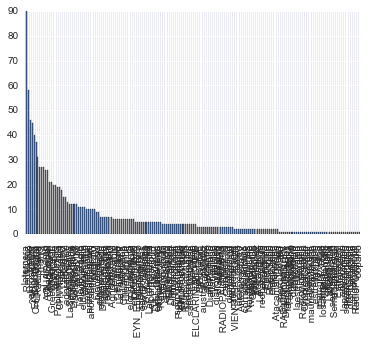

In [7]:
# Distribución de noticias del tema
news_df_topics['media'].value_counts().plot(kind='bar')

print ("Top 20 medios según cantidad de noticias registradas")
print ((news_df_topics['media'].value_counts()).nlargest(20))

# Filtrar top-20 medios:
top20_df = (news_df_topics['media'].value_counts()).nlargest(20)#.to_frame()
top20_list = top20_df.index.values.tolist()
news_df_topics_top20 = news_df_topics.loc[news_df_topics['media'].isin(top20_list)]
print(len(news_df_topics_top20))


## Análisis de tópicos por medio (Top 20)

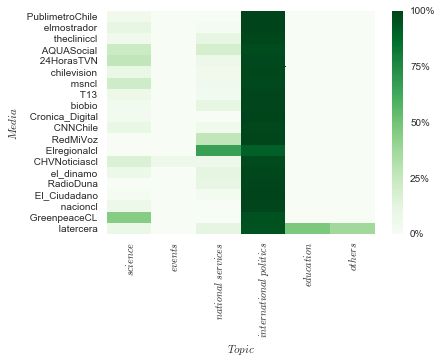

In [8]:
# plotear el porcentaje de presencia de cada tópico en los medios
amp.plotTopicByMedia(dsname=dsname, news_df_topics=news_df_topics_top20, n_topics=n_topics, topic_labels=topic_labels)

## Análisis de tópicos en el tiempo

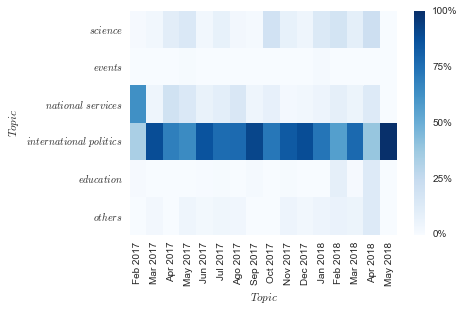

In [9]:
## Evolución del tema a través del tiempo
amp.plotMediaTimeline(dsname=dsname, news_df_topics=news_df_topics, n_topics=n_topics, groupby="month", topic_labels=topic_labels)

### Material suplementario
Cantidad de noticias sobre el tópico que se analiza:

In [10]:
news_df_topics['media'].value_counts()

 latercera           90
 RedMiVoz            58
 biobio              46
 elmostrador         45
 24HorasTVN          40
 El_Ciudadano        37
 Cronica_Digital     31
 RadioDuna           27
 msncl               27
 T13                 27
 el_dinamo           26
 AQUASocial          26
 Elregionalcl        21
 chilevision         21
 GreenpeaceCL        20
 CNNChile            20
 thecliniccl         19
 PublimetroChile     19
 CHVNoticiascl       18
 nacioncl            15
 LaRedTV             15
 adnradiochile       13
 radiomaray          12
 LaSerenaOnline      12
 pinguinodiario      12
 Cooperativa         12
 ladiscusioncl       12
 pulso_tw            11
 Tele13_Radio        11
 uchileradio         11
                     ..
 cronicacurico        1
 RadioValparaiso      1
 CronicaChillan       1
 RadioPolar           1
 Mapuexpress          1
 mauriciohofmann      1
 soychiloe            1
 estrellachiloe       1
 la7talca             1
 mercuriovalpo        1
 Estrella_Toco  